In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('creditcard.csv')

# Descripción Dataset

- El Dataset contiene transacciones de tarjetas de créditos en Europa en el mes de septiembre del 2013.
- Dada la confidencialidad de los datos, es que no se tiene el background de todas las variables. Las 28 características en las cuales no se presenta información se obtuvieron mediante PCA (Análisis de Componentes Principales), es decir, los datos están transformados.
- Las componentes que no están transformadas son 'Time' y 'Amount'. La primera contiene los segundos transcurridos entre todas las transacciones y la primera transacción del dataset y la segunda es el monto de la transacción. Finalmente, se tiene la clase 'Class', el cual es un 1 si es que es un fraude y 0 si no lo es.


### Vemos el tipo de datos de cada variable y si es que existen valores nulos:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
total= 0
fraudes = 0
for clase in df['Class']:
    if clase == 1:
        fraudes +=1
        total +=1
    else:
        total +=1
print(f'La cantidad de datos fraudulentos presentes es {fraudes} y el porcentaje de fraudes respecto al total es un {round((fraudes/total)*100,3)}%')
no_fraudes=total-fraudes

La cantidad de datos fraudulentos presentes es 492 y el porcentaje de fraudes respecto al total es un 0.173%


Se presentan 492 casos fraudulentos de 284.807 transacciones totales. Es decir, el dataset está totalmente desbalanceado, ya que los fraudes representan solo el 0,173% de todas las transacciones.

### Gráficamente esto se ve como sigue:

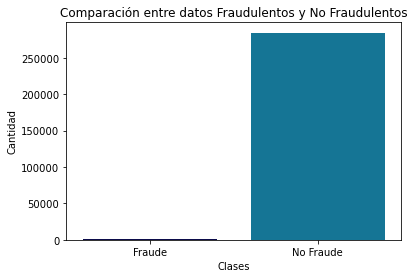

In [4]:
categorias = ['Fraude', 'No Fraude']
valores = [fraudes, no_fraudes]
df_hist = pd.DataFrame({
    'Clases': categorias,
    'Cantidad': valores
})
sns.barplot(x='Clases', y='Cantidad', data=df_hist, palette='ocean')
plt.title('Comparación entre datos Fraudulentos y No Fraudulentos')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.show()

### Por el desconocimiento de 28 covariables es que, en un principio, se hará un análisis de las componentes conocidas ('Time', 'Amount', 'Class'):

### Para ver la correlación entre estas, se hace un mapa de calor:

<AxesSubplot:>

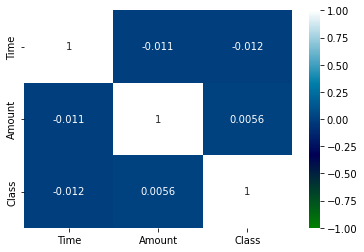

In [5]:
df1 = df[['Time','Amount','Class']]
sns.heatmap(df1.corr(),annot=True,cmap='ocean',vmin=-1,vmax=1)

### A continuación se muestran gráficos del tipo pairplot, de donde se pueden ver de forma cualitativa los resultados obtenidos en el mapa de calor:

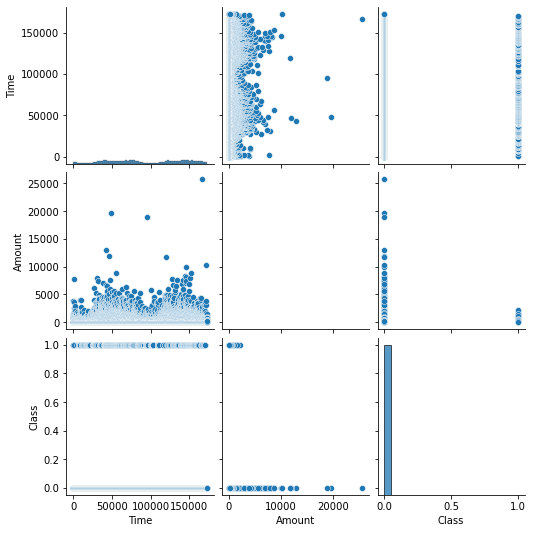

In [6]:
sns.pairplot(df1)

### Ahora, se va a filtrar el dataset por clase y se va a hacer estadística por separado para cada clase, para luego comparar resultados.

In [13]:
df1_fraud = df1[df1['Class'] == 1] 
df1_no_fraud = df1[df1['Class'] == 0]

### Se mostrará cómo se distribuyen los datos para Time y Amount:

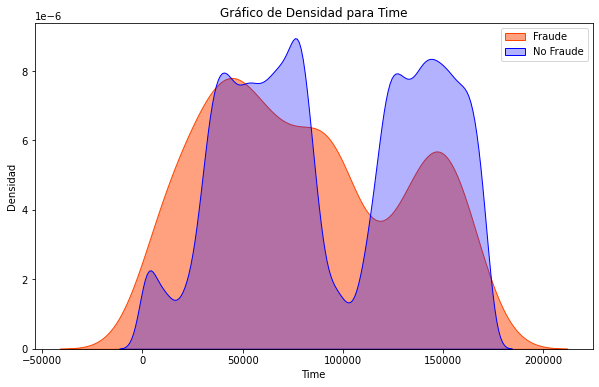

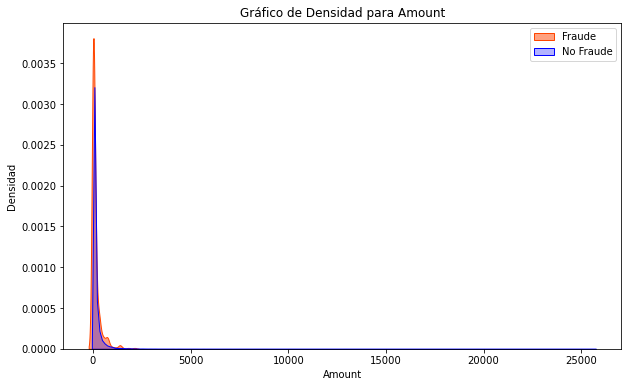

In [17]:
columnas_conocidas = ['Time','Amount']
for col in columnas_conocidas:
    plt.figure(figsize=(10, 6)) 
    sns.kdeplot(df1_fraud[col], fill=True, color='orangered', alpha=0.5, label='Fraude')  
    sns.kdeplot(df1_no_fraud[col], fill=True, color='blue', alpha=0.3, label='No Fraude')  
    plt.title(f'Gráfico de Densidad para {col}')  
    plt.xlabel(col) 
    plt.ylabel('Densidad') 
    plt.legend() 
    plt.show()

### Se hará la misma comparación, pero para las covariables que se desconoce su significado:

#### Quitamos las columnas conocidas, salvo 'Class':

In [23]:
df2 = df.drop(columns=['Amount','Time'])

#### Filtramos por Fraude o No Fraude:

In [25]:
df2_fraud = df2[df2['Class'] == 1] 
df2_no_fraud = df2[df2['Class'] == 0]

#### Generamos una lista que contenga solo las columnas desconocidas:

In [27]:
df_desconocido = df.drop(columns=['Amount', 'Time', 'Class'])
columnas = df_desconocido.columns.tolist()

### Finalmente, se grafica:

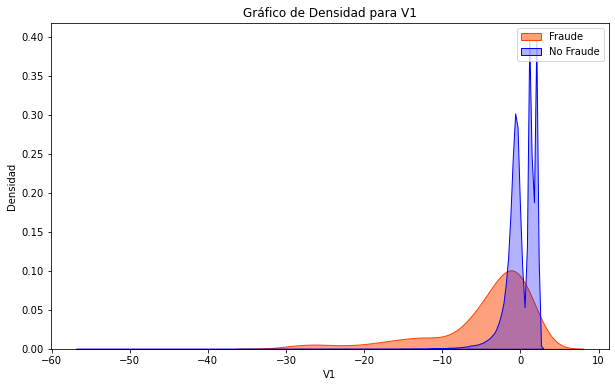

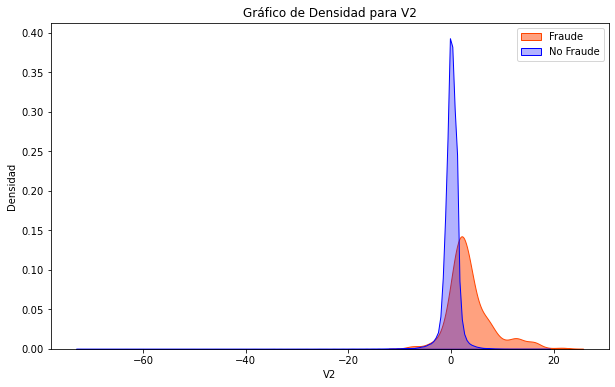

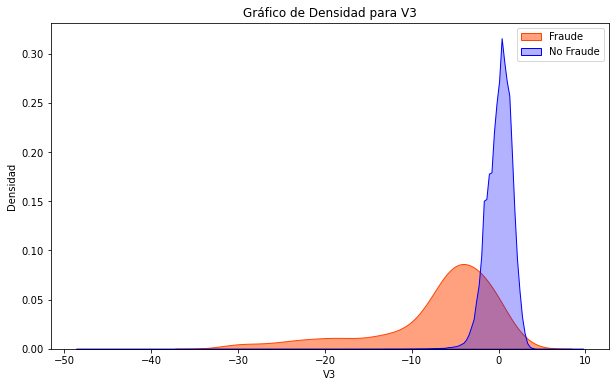

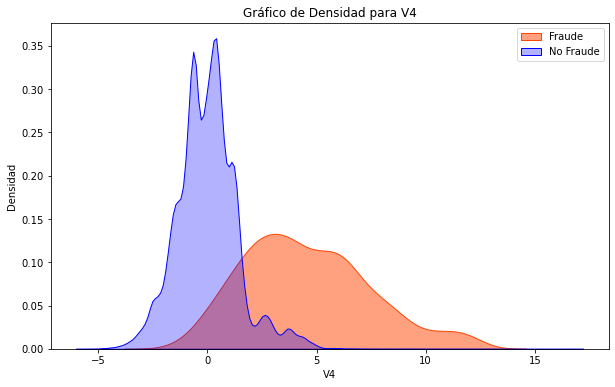

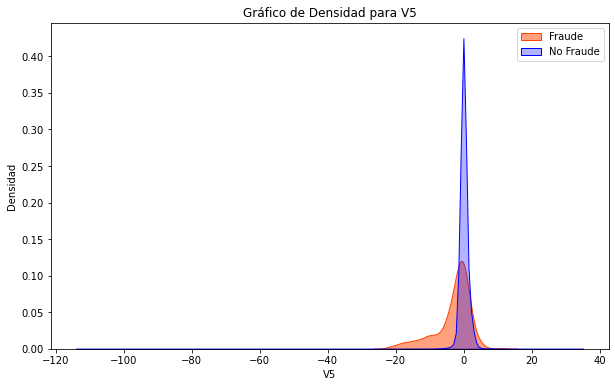

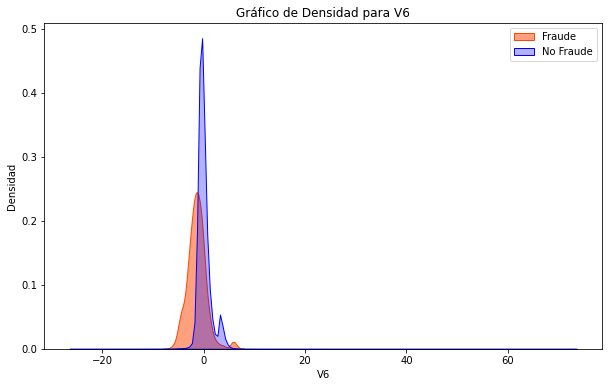

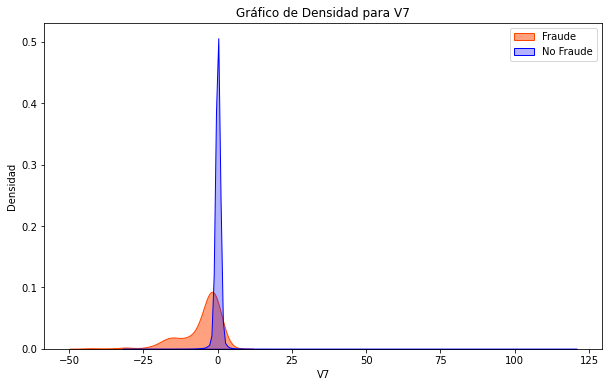

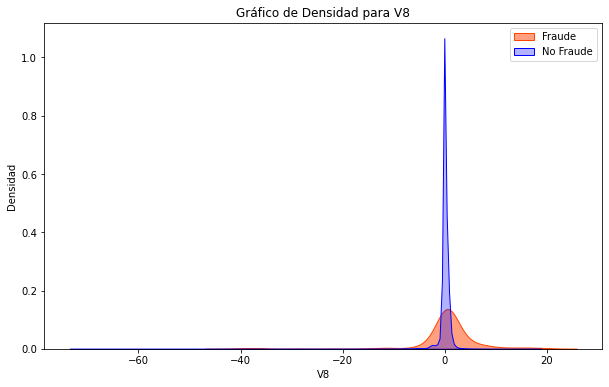

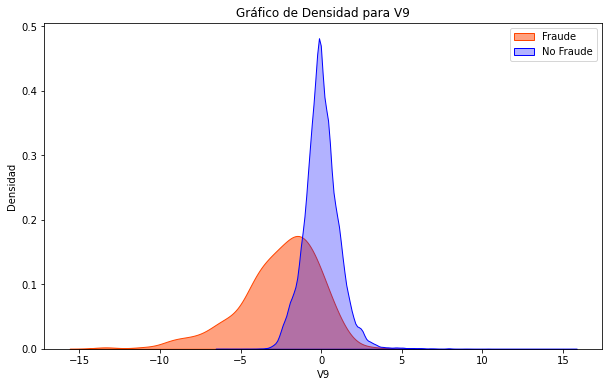

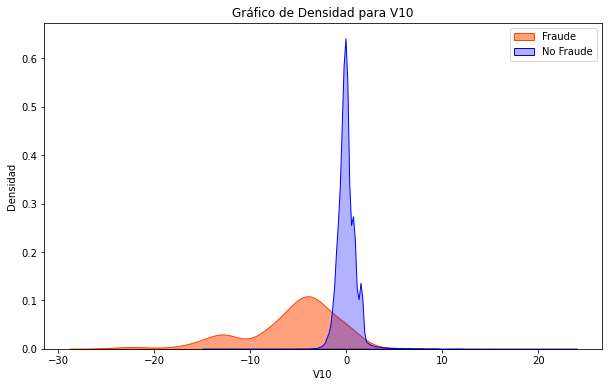

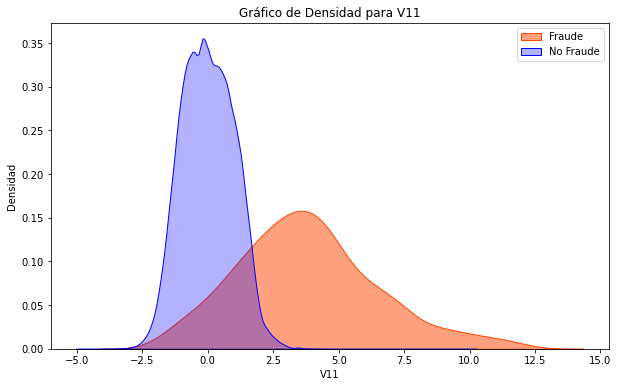

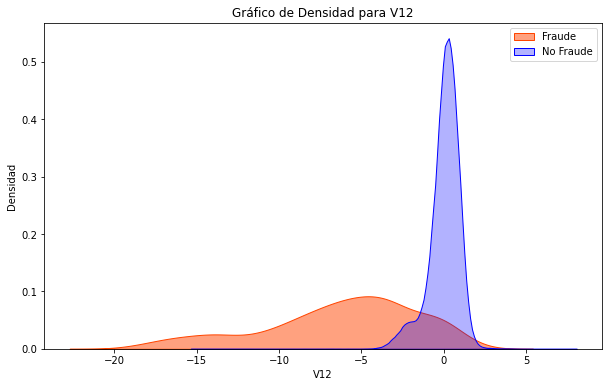

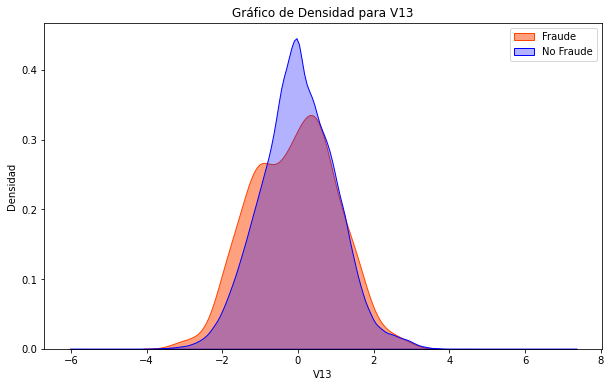

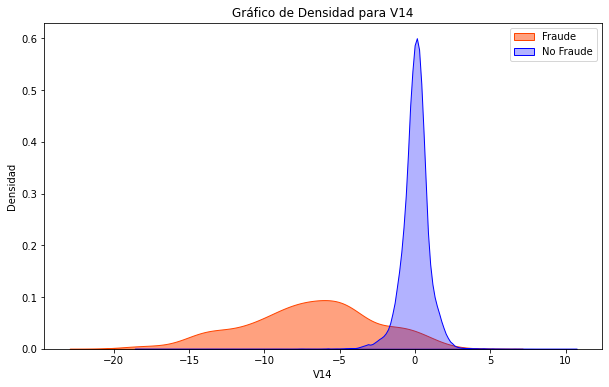

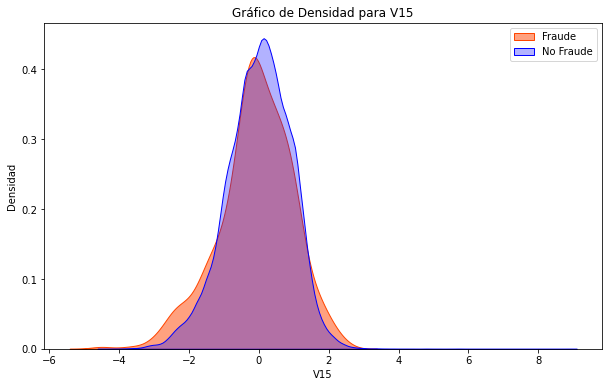

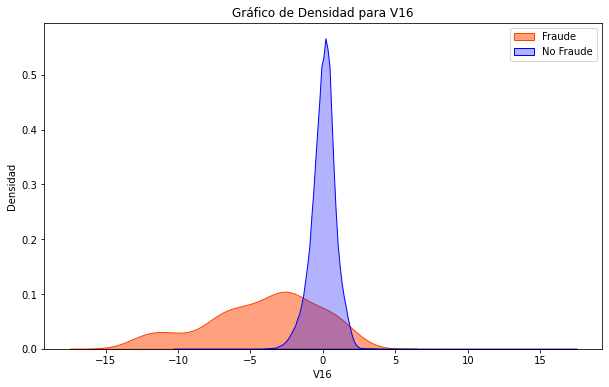

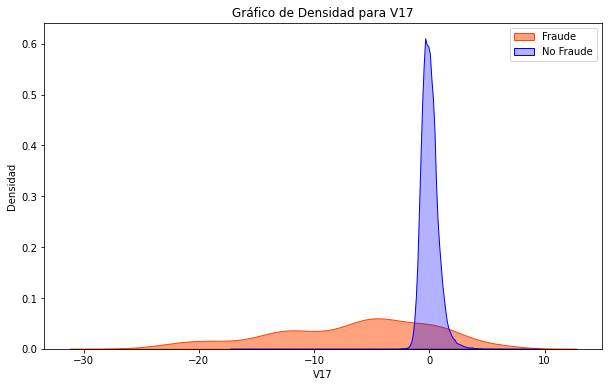

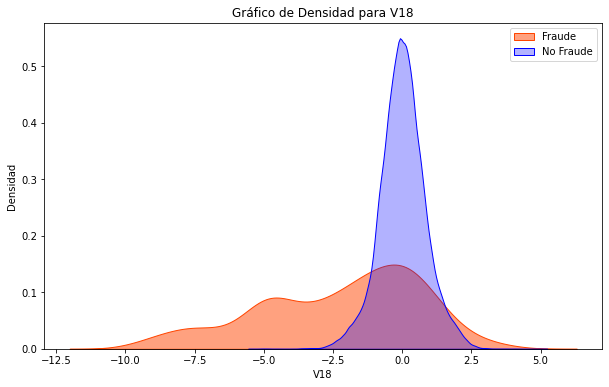

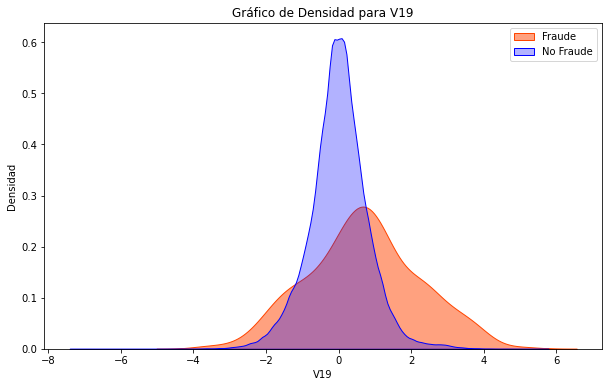

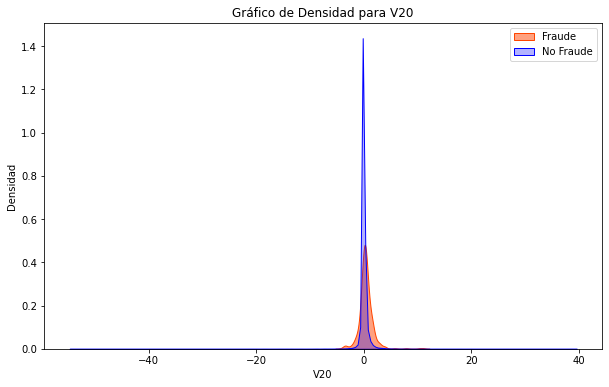

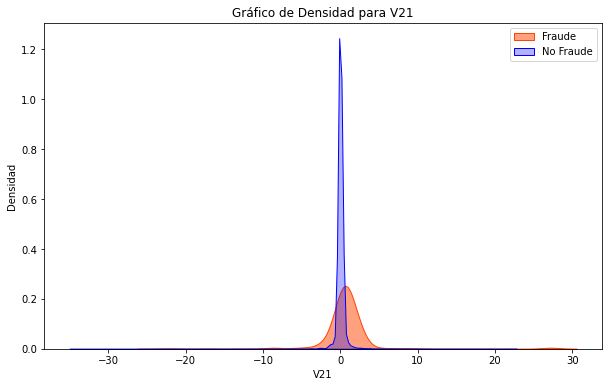

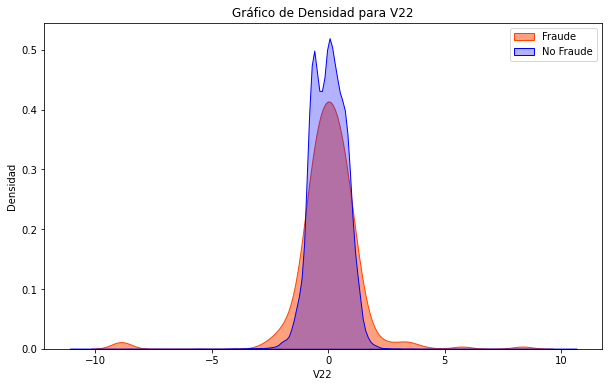

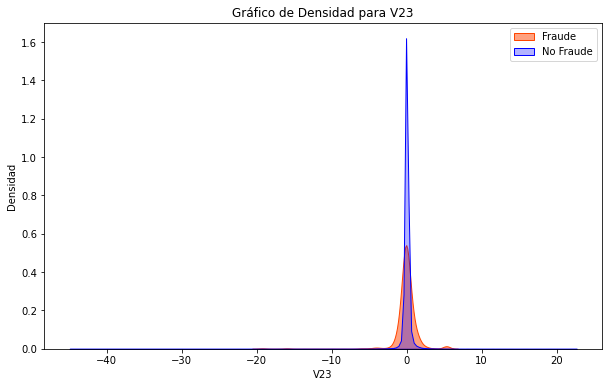

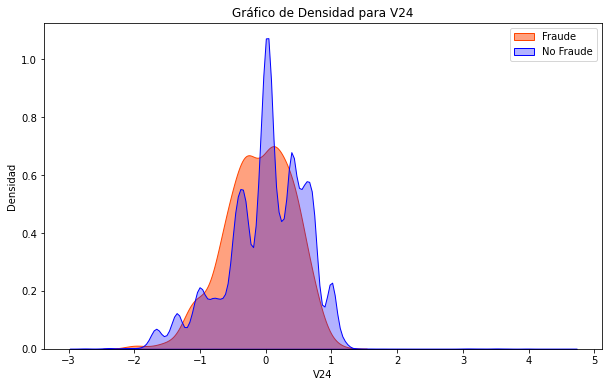

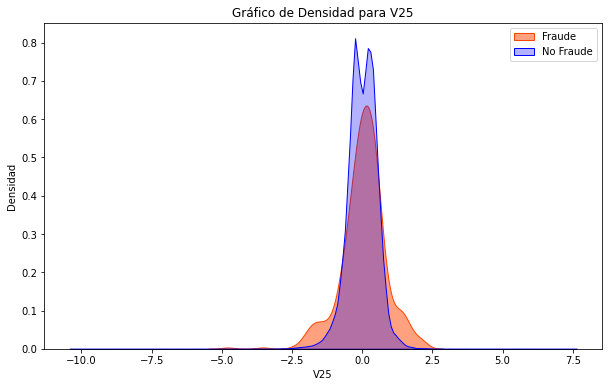

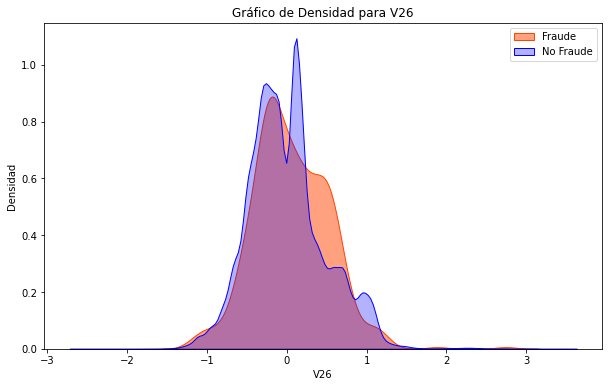

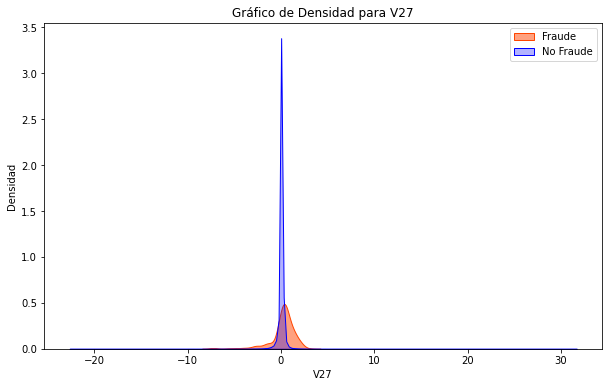

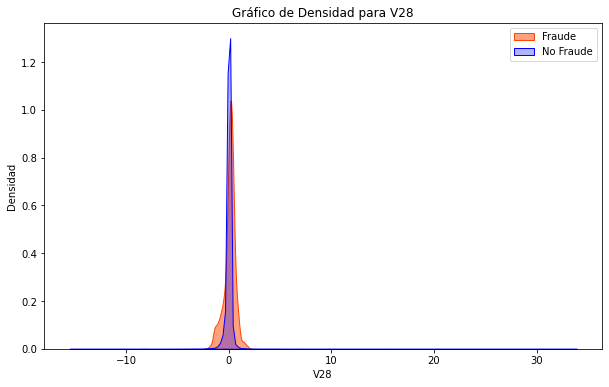

In [29]:
for col in columnas:
    plt.figure(figsize=(10, 6)) 
    sns.kdeplot(df2_fraud[col], fill=True, color='orangered', alpha=0.5, label='Fraude')  
    sns.kdeplot(df2_no_fraud[col], fill=True, color='blue', alpha=0.3, label='No Fraude')  
    plt.title(f'Gráfico de Densidad para {col}')  
    plt.xlabel(col) 
    plt.ylabel('Densidad') 
    plt.legend() 
    plt.show()

### Al desconocer el contexto de estas columnas, no se pueden sacar demasiadas conclusiones de estos gráficos de densidad.

# PCA

Para, quizás, reducir dimensionalidad, eliminar correlación que pudiese llegar a afectar al modelo y facilitar la visualización, es que se aplicará PCA.

### Librerías:

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

### Se estandarizan los datos:

In [31]:
X = df.drop(['Class'],axis=1)
y = df.Class
std_data = pd.DataFrame(StandardScaler().fit_transform(X),columns = df.columns[:-1])

### La idea es escoger una cantidad de componentes que nos de una varianza explicada que conserve gran parte de la información relevante (ojalá sobre el 90%), pero que, obviamente, se disminuya la dimensionalidad del problema.

In [43]:
pca_dict = {}
for n in range(30,-1,-1):
    sklearn_pca = PCA(n_components=n,random_state=1)
    xpca = sklearn_pca.fit_transform(std_data)
    varx = sklearn_pca.explained_variance_ratio_.sum()
    pca_dict[n] = varx

#### El código de arriba genera un diccionario con la cantidad de componentes utilizadas y su respectiva suma acumulada de varianza explicada

In [44]:
pca_dict

{30: 1.0,
 29: 0.998594836541441,
 28: 0.9880650124413211,
 27: 0.9547316791079885,
 26: 0.9213983457746553,
 25: 0.888065012441322,
 24: 0.8547316791079886,
 23: 0.8213983457746553,
 22: 0.7880650124413218,
 21: 0.7547316791079884,
 20: 0.7213983457746553,
 19: 0.6880650124412478,
 18: 0.6547316617365895,
 17: 0.6213843181020836,
 16: 0.5880207861968456,
 15: 0.5547249634031106,
 14: 0.5213479050743075,
 13: 0.48804288758000314,
 12: 0.45464967058462846,
 11: 0.4213126323743778,
 10: 0.3879003097880259,
 9: 0.3546230275310791,
 8: 0.3213342684187104,
 7: 0.2879574547499927,
 6: 0.25451280943656285,
 5: 0.22121672907637277,
 4: 0.1878416962614291,
 3: 0.15453031234707743,
 2: 0.12138731692376847,
 1: 0.06527383509709617,
 0: 0.0}

### Ahora, gráficamos los resultados obtenidos:

#### Se crea una lista con las llaves y otra con los valores del diccionario obtenido

In [45]:
n_componentes = list(pca_dict.keys())
varianza = list(pca_dict.values())

#### Se grafica y muestra el límite antes mencionado de 90% 

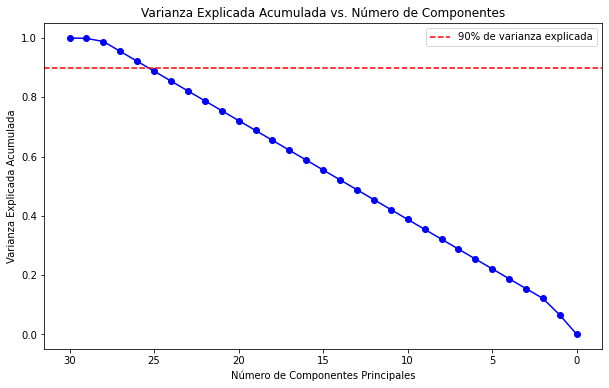

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(n_componentes, varianza, marker='o', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de varianza explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

#### De lo anterior se concluye que con 26 componentes es suficiente para conservar la mayoría de la información relevante y además obtener un conjunto de menos dimensionalidad.

In [50]:
print(f'Con n=26, se obtiene un {pca_dict[26]*100}% de varianza explicada acumulada')

Con n=26, se obtiene un 92.13983457746554% de varianza explicada acumulada


In [57]:
sklearn_pca = PCA(n_components=26,random_state=1)
xpca = sklearn_pca.fit_transform(std_data)

### Librerías:

In [56]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split

### Se separa en conjunto de entrenamiento y de prueba, en una razón 80%-20%:

In [58]:
X_train, X_test, y_train, y_test = train_test_split(xpca, df['Class'], test_size=0.2, random_state=42)

### Además de la métrica, se verificará el tiempo que tarda en calcular

In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
import time 

# Random Forest

Random Forest:
  AUPRC: 0.8568
  Exactitud: 0.9995
  Puntuación F1: 0.8276
  AUC: 0.9524
  Tiempo de entrenamiento (segundos): 179.6148
  Tiempo de clasificación (segundos): 0.4408


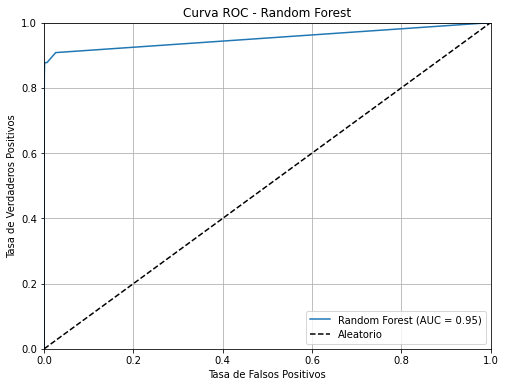

In [63]:
# Entrenamiento y  cálculo del tiempo de entrenamiento:
rf_model = RandomForestClassifier()
start_time = time.time()
rf_model.fit(X_train, y_train)
elapsed_training_time_rf = time.time() - start_time

# Predicción y cálculo del tiempo de clasificación:
start_time = time.time()
y_pred_rf = rf_model.predict(X_test)
elapsed_classification_time_rf = time.time() - start_time

# Métricas:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
auprc_rf = average_precision_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Resultados:
print(f'Random Forest:')
print(f'  AUPRC: {auprc_rf:.4f}')
print(f'  Exactitud: {accuracy_rf:.4f}')
print(f'  Puntuación F1: {f1_rf:.4f}')
print(f'  AUC: {roc_auc_rf:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_rf:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_rf:.4f}')

# Curva ROC:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Gradient Boosting

Gradient Boosting:
  AUPRC: 0.4131
  Exactitud: 0.9988
  Puntuación F1: 0.5352
  AUC: 0.6118
  Tiempo de entrenamiento (segundos): 234.6327
  Tiempo de clasificación (segundos): 0.0529


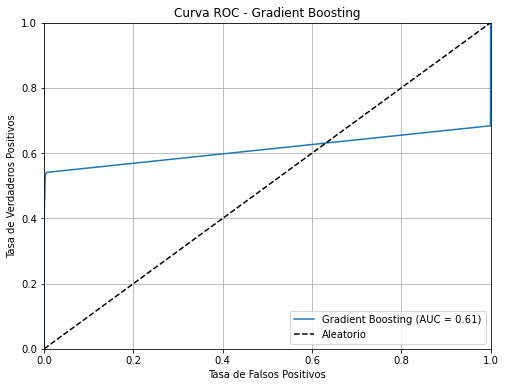

In [64]:
# Entrenamiento y  cálculo del tiempo de entrenamiento:
gb_model = GradientBoostingClassifier()
start_time = time.time()
gb_model.fit(X_train, y_train)
elapsed_training_time_gb = time.time() - start_time

# Predicción y cálculo del tiempo de clasificación:
start_time = time.time()
y_pred_gb = gb_model.predict(X_test)
elapsed_classification_time_gb = time.time() - start_time

# Métricas:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auprc_gb = average_precision_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# Resultados:
print(f'Gradient Boosting:')
print(f'  AUPRC: {auprc_gb:.4f}')
print(f'  Exactitud: {accuracy_gb:.4f}')
print(f'  Puntuación F1: {f1_gb:.4f}')
print(f'  AUC: {roc_auc_gb:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_gb:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_gb:.4f}')

# Curva ROC:
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Redes Neuronales

Redes Neuronales:
  AUPRC: 0.8497
  Exactitud: 0.9993
  Puntuación F1: 0.7957
  AUC: 0.9780
  Tiempo de entrenamiento (segundos): 24.4815
  Tiempo de clasificación (segundos): 0.0509


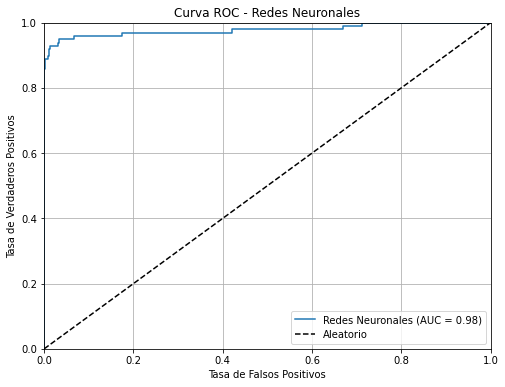

In [65]:
# Entrenamiento y  cálculo del tiempo de entrenamiento:
nn_model = MLPClassifier(max_iter=1000) 
start_time = time.time()
nn_model.fit(X_train, y_train)
elapsed_training_time_nn = time.time() - start_time

# Predicción y cálculo del tiempo de clasificación:
start_time = time.time()
y_pred_nn = nn_model.predict(X_test)
elapsed_classification_time_nn = time.time() - start_time

# Métricas:
accuracy_nn = accuracy_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1])
auprc_nn = average_precision_score(y_test, nn_model.predict_proba(X_test)[:, 1])

# Resultados:
print(f'Redes Neuronales:')
print(f'  AUPRC: {auprc_nn:.4f}')
print(f'  Exactitud: {accuracy_nn:.4f}')
print(f'  Puntuación F1: {f1_nn:.4f}')
print(f'  AUC: {roc_auc_nn:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_nn:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_nn:.4f}')

# Curva ROC:
y_proba_nn = nn_model.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label='Redes Neuronales (AUC = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Redes Neuronales')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Otros modelos:

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# KNN

K-Nearest Neighbors (KNN):
  AUPRC: 0.8280
  Exactitud: 0.9994
  Puntuación F1: 0.7882
  AUC: 0.9437
  Tiempo de entrenamiento (segundos): 0.0209
  Tiempo de clasificación (segundos): 196.4588


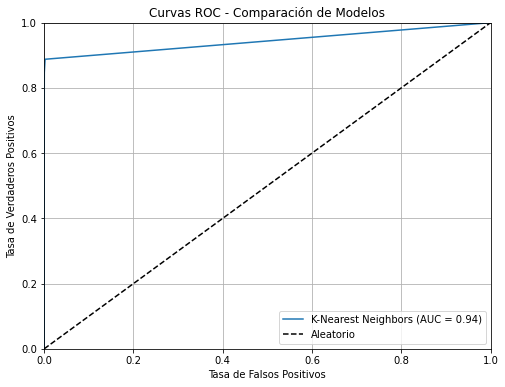

In [73]:
# Entrenamiento y  cálculo del tiempo de entrenamiento:
knn_model = KNeighborsClassifier(n_neighbors=10)
start_time = time.time()
knn_model.fit(X_train, y_train)
elapsed_training_time_knn = time.time() - start_time

# Predicción y cálculo del tiempo de clasificación:
start_time = time.time()
y_pred_knn = knn_model.predict(X_test)
elapsed_classification_time_knn = time.time() - start_time

# Métricas:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
auprc_knn = average_precision_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Resultados:
print(f'K-Nearest Neighbors (KNN):')
print(f'  AUPRC: {auprc_knn:.4f}')
print(f'  Exactitud: {accuracy_knn:.4f}')
print(f'  Puntuación F1: {f1_knn:.4f}')
print(f'  AUC: {roc_auc_knn:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_knn:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_knn:.4f}')
# Curva ROC:
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Decision Tree


Decision Tree:
  AUPRC: 0.6889
  Exactitud: 0.9994
  Puntuación F1: 0.8114
  AUC: 0.8204
  Tiempo de entrenamiento (segundos): 7.6895
  Tiempo de clasificación (segundos): 0.0050


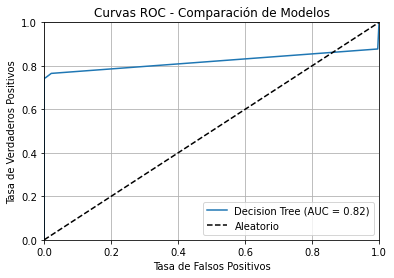

In [74]:
# Entrenamiento y  cálculo del tiempo de entrenamiento:
dt_model = DecisionTreeClassifier(max_depth=10)
start_time = time.time()
dt_model.fit(X_train, y_train)
elapsed_training_time_dt = time.time() - start_time

# Predicción y cálculo del tiempo de clasificación:
start_time = time.time()
y_pred_dt = dt_model.predict(X_test)
elapsed_classification_time_dt = time.time() - start_time

# Métricas:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
auprc_dt = average_precision_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# Resultados:
print(f'\nDecision Tree:')
print(f'  AUPRC: {auprc_dt:.4f}')
print(f'  Exactitud: {accuracy_dt:.4f}')
print(f'  Puntuación F1: {f1_dt:.4f}')
print(f'  AUC: {roc_auc_dt:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_dt:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_dt:.4f}')

# Curva ROC:
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Naive Bayes


Naive Bayes:
  AUPRC: 0.0820
  Exactitud: 0.9797
  Puntuación F1: 0.1201
  AUC: 0.9568
  Tiempo de entrenamiento (segundos): 0.0917
  Tiempo de clasificación (segundos): 0.0259


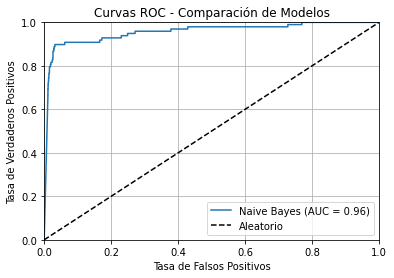

In [75]:
# Entrenamiento y  cálculo del tiempo de entrenamiento:
nb_model = GaussianNB()
start_time = time.time()
nb_model.fit(X_train, y_train)
elapsed_training_time_nb = time.time() - start_time

# Predicción y cálculo del tiempo de clasificación:
start_time = time.time()
y_pred_nb = nb_model.predict(X_test)
elapsed_classification_time_nb = time.time() - start_time

# Métricas:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
auprc_nb = average_precision_score(y_test, nb_model.predict_proba(X_test)[:, 1])

# Resultados:
print(f'\nNaive Bayes:')
print(f'  AUPRC: {auprc_nb:.4f}')
print(f'  Exactitud: {accuracy_nb:.4f}')
print(f'  Puntuación F1: {f1_nb:.4f}')
print(f'  AUC: {roc_auc_nb:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_nb:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_nb:.4f}')

# Curva ROC:
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Quadratic Discriminant Analysis


Quadratic Discriminant Analysis (QDA):
  AUPRC: 0.1419
  Exactitud: 0.9743
  Puntuación F1: 0.1074
  AUC: 0.9793
  Tiempo de entrenamiento (segundos): 0.3411
  Tiempo de clasificación (segundos): 0.0329


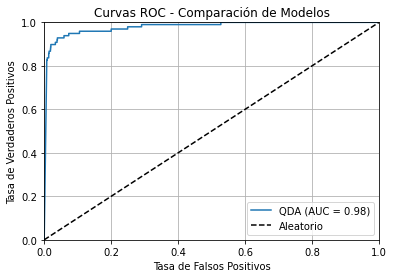

In [76]:
# Entrenamiento y  cálculo del tiempo de entrenamiento:
qda_model = QuadraticDiscriminantAnalysis()
start_time = time.time()
qda_model.fit(X_train, y_train)
elapsed_training_time_qda = time.time() - start_time

# Predicción y cálculo del tiempo de clasificación:
start_time = time.time()
y_pred_qda = qda_model.predict(X_test)
elapsed_classification_time_qda = time.time() - start_time

# Métricas:
accuracy_qda = accuracy_score(y_test, y_pred_qda)
f1_qda = f1_score(y_test, y_pred_qda)
roc_auc_qda = roc_auc_score(y_test, qda_model.predict_proba(X_test)[:, 1])
auprc_qda = average_precision_score(y_test, qda_model.predict_proba(X_test)[:, 1])

# Resultados:
print(f'\nQuadratic Discriminant Analysis (QDA):')
print(f'  AUPRC: {auprc_qda:.4f}')
print(f'  Exactitud: {accuracy_qda:.4f}')
print(f'  Puntuación F1: {f1_qda:.4f}')
print(f'  AUC: {roc_auc_qda:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_qda:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_qda:.4f}')

# Curva ROC:
y_proba_qda = qda_model.predict_proba(X_test)[:, 1]
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_proba_qda)
plt.plot(fpr_qda, tpr_qda, label='QDA (AUC = {:.2f})'.format(roc_auc_qda))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()